<a href="https://colab.research.google.com/github/Eren1995/sales_dataAnalyst/blob/main/cluster_the_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [ ]:
#from google.colab import files
#uploaded = files.upload()

# Setelah file diunggah, Anda bisa membaca file tersebut seperti biasa
sales_df = pd.read_csv('fact_order.csv')

# Split the single column into multiple columns
#new_salesdf = sales_df[0].str.split(';', expand=True)
# Assign column names
#new_salesdf.columns = ['sk_waktu', 'sk_customer', 'sk_sales', 'benang', 'jenisKain', '


In [ ]:
sales_df
#sales_df.info()

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga
0,20180103,21,9,32CM SPD,RIB,SWC,25.40,1981200.0
1,20180103,21,9,30CM,S/K,SWC,507.10,34482800.0
2,20180103,14,1,20CE,RIB,PUTIH,25.60,1612800.0
3,20180103,14,1,23CE,S/K,PUTIH,505.80,31359600.0
4,20180104,21,9,32CM SPD,RIB,SWC,25.40,1981200.0
...,...,...,...,...,...,...,...,...
11695,20230127,249,15,24C20,S/K,SIENNA BROWN,360.50,44341500.0
11696,20230127,249,15,24C21,RIB,ARMY GREEN,17.95,2100150.0
11697,20230127,249,15,24C21,S/K,ARMY GREEN,383.15,44445400.0
11698,20230127,358,15,30CE/20PE,BABY TERRY,HITAM,1069.30,117623000.0


In [ ]:
sales_df.describe()

,sk_waktu,sk_customer,sk_sales,totalKgQuantityOrdered,totalHarga
count,1.170000e+04,11700.000000,11700.000000,11700.000000,1.170000e+04
mean,2.020734e+07,172.009487,9.868291,173.775321,1.675426e+07
std,1.511883e+04,95.662595,5.785744,335.285438,3.201626e+07
min,2.018010e+07,2.000000,1.000000,0.010000,0.000000e+00
25%,2.019110e+07,97.000000,3.000000,14.600000,1.055230e+06
50%,2.021092e+07,175.000000,14.000000,49.995000,4.172040e+06
75%,2.022053e+07,234.000000,15.000000,206.675000,1.957706e+07
max,2.023013e+07,362.000000,18.000000,10437.380000,4.875017e+08


In [ ]:
# Mengubah tipe data dari float ke integer
sales_df['totalKgQuantityOrdered'] = sales_df['totalKgQuantityOrdered'].astype(int)
sales_df['totalHarga'] = sales_df['totalHarga'].astype(int)

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   sk_waktu                11700 non-null  int64 
 1   sk_customer             11700 non-null  int64 
 2   sk_sales                11700 non-null  int64 
 3   benang                  11700 non-null  object
 4   jenisKain               11700 non-null  object
 5   warna                   11700 non-null  object
 6   totalKgQuantityOrdered  11700 non-null  int64 
 7   totalHarga              11700 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 731.4+ KB


In [ ]:
sales_df

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga
0,20180103,21,9,32CM SPD,RIB,SWC,25,1981200
1,20180103,21,9,30CM,S/K,SWC,507,34482800
2,20180103,14,1,20CE,RIB,PUTIH,25,1612800
3,20180103,14,1,23CE,S/K,PUTIH,505,31359600
4,20180104,21,9,32CM SPD,RIB,SWC,25,1981200
...,...,...,...,...,...,...,...,...
11695,20230127,249,15,24C20,S/K,SIENNA BROWN,360,44341500
11696,20230127,249,15,24C21,RIB,ARMY GREEN,17,2100150
11697,20230127,249,15,24C21,S/K,ARMY GREEN,383,44445400
11698,20230127,358,15,30CE/20PE,BABY TERRY,HITAM,1069,117623000


In [ ]:
sales_df.describe()

,sk_waktu,sk_customer,sk_sales,totalKgQuantityOrdered,totalHarga
count,1.170000e+04,11700.000000,11700.000000,11700.000000,1.170000e+04
mean,2.020734e+07,172.009487,9.868291,173.329658,1.675426e+07
std,1.511883e+04,95.662595,5.785744,335.267305,3.201626e+07
min,2.018010e+07,2.000000,1.000000,0.000000,0.000000e+00
25%,2.019110e+07,97.000000,3.000000,14.000000,1.055230e+06
50%,2.021092e+07,175.000000,14.000000,49.500000,4.172040e+06
75%,2.022053e+07,234.000000,15.000000,206.000000,1.957706e+07
max,2.023013e+07,362.000000,18.000000,10437.000000,4.875017e+08


In [ ]:
# Menggunakan describe() untuk menghasilkan statistik deskriptif
stats_summary = sales_df.describe()

# Mengatur tampilan angka dalam format biasa
pd.options.display.float_format = '{:.0f}'.format

# Menampilkan statistik deskriptif dengan format angka biasa
print(stats_summary)


       sk_waktu  sk_customer  sk_sales  totalKgQuantityOrdered  totalHarga
count     11700        11700     11700                   11700       11700
mean   20207339          172        10                     173    16754257
std       15119           96         6                     335    32016255
min    20180103            2         1                       0           0
25%    20191101           97         3                      14     1055230
50%    20210920          175        14                      50     4172040
75%    20220531          234        15                     206    19577055
max    20230127          362        18                   10437   487501740


In [ ]:

# Mengambil baris 'max' saja
max_values = stats_summary.loc['max']

# Menampilkan baris 'max' dengan atribut lainnya
print(max_values)

sk_waktu                  20230127
sk_customer                    362
sk_sales                        18
totalKgQuantityOrdered       10437
totalHarga               487501740
Name: max, dtype: float64


# Cluster the data

In [ ]:

# Define the number of clusters
num_clusters = 3

# Extract relevant columns
X = sales_df[['jenisKain', 'warna', 'benang', 'totalHarga']]

# Example: setting n_init to 'auto' (future default)
#kmeans = KMeans(n_clusters=3, n_init='auto')

# Convert categorical data to numerical data using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['jenisKain', 'warna', 'benang'])

# Apply KMeans clustering
#kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
sales_df['cluster'] = kmeans.fit_predict(X_encoded)

# Display the first few rows of the dataframe with the cluster labels
#print(sales_df.head())
print(sales_df.head().to_string(index=False))

 sk_waktu  sk_customer  sk_sales          benang jenisKain warna  totalKgQuantityOrdered  totalHarga  cluster
 20180103           21         9 32CM SPD              RIB   SWC                      25     1981200        2
 20180103           21         9 30CM                  S/K   SWC                     507    34482800        0
 20180103           14         1 20CE                  RIB PUTIH                      25     1612800        2
 20180103           14         1            23CE       S/K PUTIH                     505    31359600        0
 20180104           21         9 32CM SPD              RIB   SWC                      25     1981200        2


In [ ]:
# Count the occurrences of each cluster
cluster_counts = sales_df['cluster'].value_counts()

# Get the count for cluster 0
count_cluster_0 = cluster_counts[0]
count_cluster_1 = cluster_counts[1]
count_cluster_2 = cluster_counts[2]
print(f'Number of rows in cluster 0: {count_cluster_0}')
print(f'Number of rows in cluster 1: {count_cluster_1}')
print(f'Number of rows in cluster 2: {count_cluster_2}')

Number of rows in cluster 0: 2144
Number of rows in cluster 1: 9278
Number of rows in cluster 2: 278


In [ ]:
from sklearn.cluster import KMeans
# Save the DataFrame with cluster labels to a CSV file
sales_df.to_csv('sales_with_clusters.csv', index=False)

# Confirm that the file has been saved
print("DataFrame with cluster labels saved to 'sales_with_clusters.csv'")

DataFrame with cluster labels saved to 'sales_with_clusters.csv'


In [ ]:
# Download the file
files.download('sales_with_clusters.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

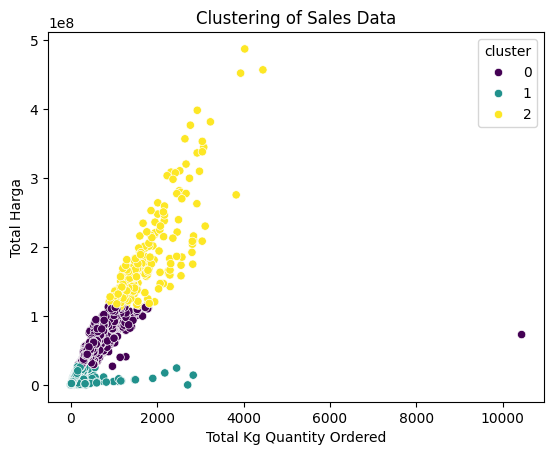

In [ ]:
# Set the background color to white for better visibility
plt.figure(facecolor='white')

# Create a scatter plot
sns.scatterplot(data=sales_df, x='totalKgQuantityOrdered', y='totalHarga', hue='cluster', palette='viridis')

# Set plot labels and title
plt.xlabel('Total Kg Quantity Ordered')
plt.ylabel('Total Harga')
plt.title('Clustering of Sales Data')

# Show the plot
plt.show()

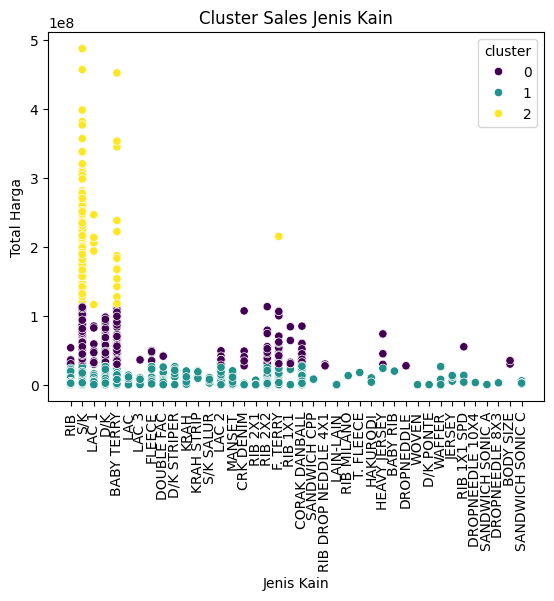

In [ ]:
# Set the background color to white for better visibility
plt.figure(facecolor='white')

# Create a scatter plot
sns.scatterplot(data=sales_df, x='jenisKain', y='totalHarga', hue='cluster', palette='viridis')

# Set plot labels and title
plt.xlabel('Jenis Kain')
plt.ylabel('Total Harga')
plt.title('Cluster Sales Jenis Kain')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
# Set the background color to white for better visibility
plt.figure(facecolor='white')

# Create a scatter plot
sns.scatterplot(data=sales_df, x='benang', y='totalHarga', hue='cluster', palette='viridis')

# Set plot labels and title
plt.xlabel('Benang')
plt.ylabel('Total Harga')
plt.title('Cluster Sales Benang')
plt.xticks(rotation=90)

# Show the plot
plt.show()

NameError: name 'plt' is not defined

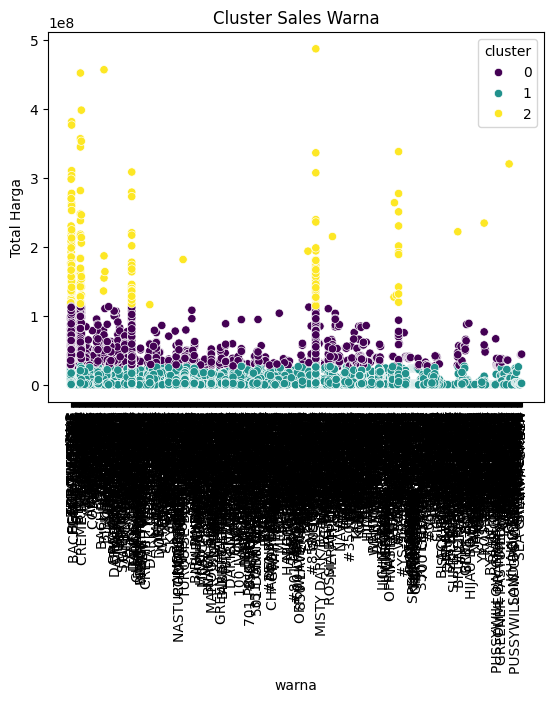

In [ ]:
# Set the background color to white for better visibility
plt.figure(facecolor='white')

# Create a scatter plot
sns.scatterplot(data=sales_df, x='warna', y='totalHarga', hue='cluster', palette='viridis')

# Set plot labels and title
plt.xlabel('warna')
plt.ylabel('Total Harga')
plt.title('Cluster Sales Warna')
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
cluster_0_df = sales_df[sales_df['cluster'] == 0]
display(cluster_0_df.head())

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
1,20180103,21,9,30CM,S/K,SWC,507,34482800,0
3,20180103,14,1,23CE,S/K,PUTIH,505,31359600,0
5,20180104,21,9,30CM,S/K,SWC,511,34754800,0
7,20180104,23,10,32CM,S/K,PUTIH,1238,87328350,0
11,20180103,14,1,23CE,S/K,PUTIH,507,31489800,0


In [ ]:
cluster_1_df = sales_df[sales_df['cluster'] == 1]
display(cluster_1_df.head())

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
0,20180103,21,9,32CM SPD,RIB,SWC,25,1981200,1
2,20180103,14,1,20CE,RIB,PUTIH,25,1612800,1
4,20180104,21,9,32CM SPD,RIB,SWC,25,1981200,1
6,20180104,23,10,32CM SPD,RIB,PUTIH,50,4025000,1
8,20180103,24,10,24CE/PE,LAC 1,Hitam,119,10184700,1


In [ ]:
cluster_2_df = sales_df[sales_df['cluster'] == 2]
display(cluster_2_df.head())

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
232,20180131,12,16,23CE,S/K,PUTIH,1944,120583800,2
378,20180212,49,1,30 COTTON HK A,S/K,PUTIH,1541,114046580,2
388,20180213,10,16,30CM,S/K,PUTIH,1786,123254700,2
403,20180219,59,16,23CE,S/K,PUTIH,1792,120070700,2
428,20180222,19,16,23CE,S/K,PUTIH,2553,158341800,2


In [ ]:
# Count the occurrences of each cluster
cluster_counts = sales_df['cluster'].value_counts()

# Get the count for cluster 0
count_cluster_0 = cluster_counts[0]
count_cluster_1 = cluster_counts[1]
count_cluster_2 = cluster_counts[2]
print(f'Number of rows in cluster 0: {count_cluster_0}')
print(f'Number of rows in cluster 1: {count_cluster_1}')
print(f'Number of rows in cluster 2: {count_cluster_2}')

Number of rows in cluster 0: 2112
Number of rows in cluster 1: 9349
Number of rows in cluster 2: 239


In [ ]:
cluster_0_df = sales_df[sales_df['cluster'] == 0]
cluster_0_description = cluster_0_df.describe()
print(cluster_0_description)

files.download('cluster_0_description.csv')

       sk_waktu  sk_customer  sk_sales  totalKgQuantityOrdered  totalHarga  \
count      2112         2112      2112                    2112        2112   
mean   20207593          165        10                     489    48540963   
std       14571           92         6                     329    21040993   
min    20180103            2         1                     165    27016320   
25%    20200118           96         3                     303    32365665   
50%    20210917          187        10                     402    40332275   
75%    20220323          224        15                     581    58890900   
max    20230127          358        18                   10437   113399820   

       cluster  
count     2112  
mean         0  
std          0  
min          0  
25%          0  
50%          0  
75%          0  
max          0  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cluster_1_df = sales_df[sales_df['cluster'] == 1]
cluster_1_description = cluster_1_df.describe()
print(cluster_1_description)

NameError: name 'sales_df' is not defined

In [ ]:
cluster_2_df = sales_df[sales_df['cluster'] == 2]
cluster_2_description = cluster_2_df.describe()
print(cluster_2_description)

       sk_waktu  sk_customer  sk_sales  totalKgQuantityOrdered  totalHarga  \
count       215          215       215                     215         215   
mean   20211473          184         9                    1778   185287371   
std       12186           90         6                     648    67349956   
min    20180131           10         1                     892   118981200   
25%    20210514          175         3                    1278   139414675   
50%    20211118          198         9                    1555   165120160   
75%    20220324          238        15                    2158   204956830   
max    20230120          332        16                    4449   487501740   

       cluster  
count      215  
mean         2  
std          0  
min          2  
25%          2  
50%          2  
75%          2  
max          2  


In [ ]:
# Filter the DataFrame to show only cluster 0
cluster_0_df = sales_df[sales_df['cluster'] == 0]

# Get the top 10 rows with the highest sales in cluster 0
top_10_sales_cluster_0 = cluster_0_df.nlargest(10, 'totalHarga')

# Display the top 10 rows
display(top_10_sales_cluster_0)

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
4738,20210604,175,9,30PE/14PE,BABY TERRY,HITAM,1819,118238900,0
6849,20211220,234,3,24C20,S/K,Hitam,923,118169600,0
1666,20181109,23,10,24CE,S/K,Hitam,1229,117987840,0
4778,20210609,187,15,30CM,S/K,HITAM REAKTIF,1042,117755040,0
6861,20211220,275,7,30CM,S/K,HITAM,926,117690900,0
11698,20230127,358,15,30CE/20PE,BABY TERRY,HITAM,1069,117623000,0
7745,20220215,241,15,30CE C19,S/K,HITAM REAKTIF,1022,117576000,0
4314,20210331,187,9,30C20,S/K,HITAM,1003,117395460,0
7726,20220222,241,15,30CE C19,S/K,BLACK G6,961,117290800,0
2973,20191115,138,9,30CM,S/K,HITAM,1231,116945000,0


In [ ]:
if all(sales_df['cluster'] == 0):
    # Sort all rows by sales in descending order
    sorted_sales = sales_df.sort_values(by='totalHarga', ascending=False)
else:
    # If not all data points are in cluster 0, filter and then sort
    cluster_0_df = sales_df[sales_df['cluster'] == 0]
    sorted_sales = cluster_0_df.sort_values(by='totalHarga', ascending=False)

# Display all the sorted rows
display(sorted_sales)

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
4738,20210604,175,9,30PE/14PE,BABY TERRY,HITAM,1819,118238900,0
6849,20211220,234,3,24C20,S/K,Hitam,923,118169600,0
1666,20181109,23,10,24CE,S/K,Hitam,1229,117987840,0
4778,20210609,187,15,30CM,S/K,HITAM REAKTIF,1042,117755040,0
6861,20211220,275,7,30CM,S/K,HITAM,926,117690900,0
...,...,...,...,...,...,...,...,...,...
6027,20211005,150,3,30MICROMDL 703,S/K,MUSTARD,254,28865816,0
11431,20230103,292,15,16OE,S/K,SWC,255,28848900,0
1554,20181029,2,4,30CVC SLOGY,S/K,WHITE,303,28845800,0
2160,20190304,90,1,30/20TC,BABY TERRY,BLACK,297,28840040,0


In [ ]:
if all(sales_df['cluster'] == 1):
    # Sort all rows by sales in descending order
    sorted_sales = sales_df.sort_values(by='totalHarga', ascending=False)
else:
    # If not all data points are in cluster 0, filter and then sort
    cluster_1_df = sales_df[sales_df['cluster'] == 1]
    sorted_sales = cluster_1_df.sort_values(by='totalHarga', ascending=False)

# Display all the sorted rows
display(sorted_sales)

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
9914,20220909,150,3,32CM,S/K,AFRICADO,232,28815569,1
6037,20211005,150,3,30MICROMDL 703,S/K,KHAKI,253,28811271,1
6921,20211206,212,3,30CE C19,S/K,PUTIH,291,28810980,1
10927,20221121,343,3,40CM F. SPD,S/K,BEESWAX,174,28809000,1
3064,20191226,97,14,28CM,S/K,PUTIH,360,28808000,1
...,...,...,...,...,...,...,...,...,...
648,20180327,76,14,24SNOWFLEX,S/K,BENHUR,24,0,1
649,20180327,76,14,PQ MATSHUBA,LAC 1,NAVY TWOTONE,30,0,1
650,20180327,76,14,BT KROTO 3,BABY TERRY,NAVY GOLD TWOTONE,26,0,1
651,20180327,76,14,PQ HONEYCOM,LAC,BLUE WHITE,23,0,1


In [ ]:
if all(sales_df['cluster'] == 2):
    # Sort all rows by sales in descending order
    sorted_sales = sales_df.sort_values(by='totalHarga', ascending=False)
else:
    # If not all data points are in cluster 0, filter and then sort
    cluster_2_df = sales_df[sales_df['cluster'] == 2]
    sorted_sales = cluster_2_df.sort_values(by='totalHarga', ascending=False)

# Display all the sorted rows
display(sorted_sales)

,sk_waktu,sk_customer,sk_sales,benang,jenisKain,warna,totalKgQuantityOrdered,totalHarga,cluster
8072,20220316,309,15,30CE C19,S/K,BLACK G6,4028,487501740,2
7144,20220105,225,3,30CE C19 PLS,S/K,BLACK,4449,457126931,2
8414,20220331,293,15,30CE/20PE,BABY TERRY,HITAM,3933,452361700,2
10636,20221109,185,3,30C20,S/K,NAVY,2930,398496320,2
7381,20220124,271,1,30CE,S/K,Hitam,3234,381725280,2
...,...,...,...,...,...,...,...,...,...
10596,20221104,322,15,30C21,S/K,BLACK G6 NEW,935,119790080,2
6732,20211207,187,15,30C20,S/K,HITAM,972,119634720,2
8070,20220316,309,15,24C19,S/K,PUTIH,1159,119468670,2
5962,20210930,195,15,30CM,S/K,HITAM REAKTIF,1084,119273000,2


In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fact_order.csv')

# Filter the dataset based on the given conditions
filtered_df = df[(df['benang'] == '30PE/14PE') & (df['jenisKain'] == 'BABY TERRY') & (df['warna'] == 'HITAM')]

# Display the filtered dataset
print(filtered_df.head())
print("Filtered dataset contains", len(filtered_df), "rows.")

      sk_waktu  sk_customer  sk_sales     benang   jenisKain  warna  \
4243  20210324          175         9  30PE/14PE  BABY TERRY  HITAM   
4411  20210409          175         9  30PE/14PE  BABY TERRY  HITAM   
4537  20210422          175         9  30PE/14PE  BABY TERRY  HITAM   
4563  20210423          175         9  30PE/14PE  BABY TERRY  HITAM   
4609  20210429          175         9  30PE/14PE  BABY TERRY  HITAM   

      totalKgQuantityOrdered  totalHarga  
4243                     652    42351400  
4411                    1083    70423600  
4537                     334    21716500  
4563                    1441    93685800  
4609                     308    20034300  
Filtered dataset contains 22 rows.


In [ ]:
filtered_df = df[(df['benang'] == '30PE/14PE') & (df['jenisKain'] == 'BABY TERRY') & (df['warna'] == 'HITAM')]

# Display the filtered dataset
print(filtered_df.head())
print("Filtered dataset contains", len(filtered_df), "rows.")

# Save the filtered dataset to a CSV file
filtered_df.to_csv('filtered_fact_order.csv', index=False)

# Confirm that the file has been saved
print("Filtered dataset saved to 'filtered_fact_order.csv'")

      sk_waktu  sk_customer  sk_sales     benang   jenisKain  warna  \
4243  20210324          175         9  30PE/14PE  BABY TERRY  HITAM   
4411  20210409          175         9  30PE/14PE  BABY TERRY  HITAM   
4537  20210422          175         9  30PE/14PE  BABY TERRY  HITAM   
4563  20210423          175         9  30PE/14PE  BABY TERRY  HITAM   
4609  20210429          175         9  30PE/14PE  BABY TERRY  HITAM   

      totalKgQuantityOrdered  totalHarga  
4243                     652    42351400  
4411                    1083    70423600  
4537                     334    21716500  
4563                    1441    93685800  
4609                     308    20034300  
Filtered dataset contains 22 rows.
Filtered dataset saved to 'filtered_fact_order.csv'


In [ ]:
from google.colab import files
filtered_df = df[(df['benang'] == '30PE/14PE') & (df['jenisKain'] == 'BABY TERRY') & (df['warna'] == 'HITAM')]

# Save the filtered dataset to a CSV file
filtered_df.to_csv('filtered_fact_order.csv', index=False)

# Download the file
files.download('filtered_fact_order.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Time Series

In [ ]:
filtered_df = df[(df['benang'] == '30CE') & (df['jenisKain'] == 'BABY TERRY') & (df['warna'] == 'HITAM')]

# Save the filtered dataset to a CSV file
filtered_df.to_csv('filtered_fact_order.csv', index=False)

# Download the file
files.download('filtered_fact_order.csv')